# Part4: Model training

data is taken from https://www.kaggle.com/c/santander-customer-transaction-prediction

In this challenge, Santander invites Kagglers to help them identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data they have available to solve this problem.

The data is anonimyzed, each row containing 200 numerical values identified just with a number.

In this notebook we train different ML models, which are defined in another notebook

## Load packages

In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras import regularizers
from keras.constraints import max_norm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


# Add function to use yellowbrick visualisation tools

In [2]:
##Taken from 
##https://towardsdatascience.com/evaluating-keras-neural-network-performance-using-yellowbrick-visualizations-ad65543f3174
## FixME: doesn't work out of box :(
#import numpy as np
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.base import BaseEstimator

#class KerasBatchClassifier(KerasClassifier, BaseEstimator):
#    def __init__(self, model, **kwargs):
#        super().__init__(model)
#        self.fit_kwargs = kwargs
#        self._estimator_type = 'classifier'
#
#    def fit(self, *args, **kwargs):
#        # taken from keras.wrappers.scikit_learn.KerasClassifier.fit
#        self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
#        
#        self.classes_ = np.array(range(len(self.fit_kwargs['train_generator'].class_indices)))
#        self.__history = self.model.fit_generator(
#            self.fit_kwargs.pop('train_generator'), 
#            **self.fit_kwargs
#        )

## Load data

In [3]:
#alternative with resampling minor class
#X_train = np.load("X_train_resamp_std.npy")
#Y_train = np.load("Y_train_resamp.npy")

#original sample with split to test and validation
X_train = np.load("datasets/X_train_samp_std.npy")
Y_train = np.load("datasets/Y_train_samp.npy")



#X_test = np.load("X_test_std.npy")

print (X_train.shape)
print (Y_train.shape)
#X_test = np.fromfile("X_test_std")

(140000, 195)
(140000,)


In [4]:
#Split into train and validation datasets
X_train_NN ,X_val_NN ,Y_train_NN , Y_val_NN = train_test_split(X_train,Y_train,test_size=0.30,random_state=45)

# Monitoring of training and performance
Plot functions for monitoring of training to exclude underfitting and overfitting

In [5]:
## Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Plot training & validation acc values
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model acc')
    plt.ylabel('Auc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
## Plot training & validation auc values
def plot_auc(history):
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('Model auc')
    plt.ylabel('Auc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [6]:
#set time stamp to be used in the name of the model
#import time
name_ext = str(time())

## Load models

In [7]:
%run SantanderCustomerTransactionPrediction.Model_definition.ipynb

## Train models

## DNN

In [8]:
2*4*512
4*4*512

8192

In [9]:
#Train Keras
##model_NN_32 = build_NN_32(X_train_NN)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),histogram_freq=50, write_graph=True, write_images=True)
earlyStop = EarlyStopping(monitor='val_loss', min_delta=1e-8,patience=200,restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
#earlyStop = EarlyStopping(monitor='loss', min_delta=1e-5,patience=50,restore_best_weights=True)
class_weight = {0: 1.,1: 5.}
model_NN_32 = build_NN_test(X_train_NN)
#model_NN_32 = build_NN_LSTM(X_train_NN)
epochs=1001
history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN,shuffle=True,class_weight=class_weight, verbose=0,callbacks=[tensorboard,earlyStop,reduceLR],validation_data = (X_val_NN,Y_val_NN),epochs=epochs,batch_size=4*4*512)
#history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN,shuffle=True,class_weight=class_weight, verbose=0,callbacks=[tensorboard],validation_data = (X_val_NN,Y_val_NN),epochs=epochs,batch_size=4*4*512)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                12544     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batc

In [10]:
#model_NN_32.layers[0].get_weights()



In [11]:
##Plot keras model
#from keras.utils import plot_model
#plot_model(model_NN_32, show_shapes=True, to_file="model_NN_32_ts"+name_ext+".png")

In [12]:
###Train keras with batch skikit-learn wrapper, FixME: doesn't work due to missing train_generator
###model_NN_32 = KerasBatchClassifier(model=build_NN_test_wrap(X_train_NN), train_generator=train_generator, validation_data = (X_val_NN,Y_val_NN),epochs=30,batch_size=4*512, verbose=0)
###history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN)

###Train keras with standart skikit-learn wrapper
##model_NN_32 = KerasClassifier(build_NN_test_wrap(X_train_NN),validation_data = (X_val_NN,Y_val_NN),epochs=3,batch_size=4*512, verbose=0)
#model_NN_32 = KerasClassifier(build_NN_test_wrap(X_train_NN))
## define the grid search parameters
#batch_size = [1, 2]
#epochs = [1,2]
#param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model_NN_32, param_grid=param_grid, n_jobs=3)
#grid_result = grid.fit(X_train_NN,Y_train_NN)
## summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))
##history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN)
#history_NN_32 = grid_result

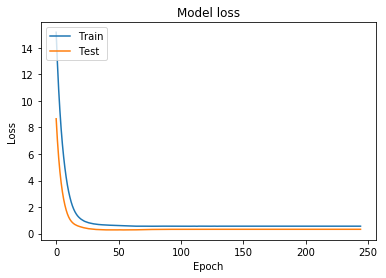

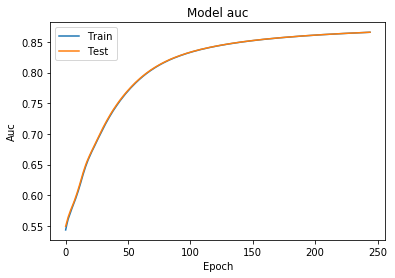

In [13]:
plot_loss(history_NN_32)
#plot_acc(history_NN_32)
plot_auc(history_NN_32)

## Save model

In [14]:
# serialize model to JSON
model_NN_32_json = model_NN_32.to_json()
with open("model_NN_32_ts"+name_ext+".json", "w") as json_file:
    json_file.write(model_NN_32_json)
# serialize weights to HDF5
model_NN_32.save_weights("model_NN_32_ts"+name_ext+".h5")
print("Saved model to disk")
print("name_ext = '",name_ext,"'")
#!ls -1t | head -5

Saved model to disk
name_ext = ' 1554876627.8983727 '


## Conclusion, observations

 * NN with X input layers and batch size 4*512 shows good performance already with Y epoch (val_acc: ZZZ)
